In [2]:
import pandas as pd
import numpy as np 
import pyarrow.parquet as pq
import os

# Fix the file path - use the correct Windows path
file_path = r'c:\Users\ellen\OneDrive - ETH Zurich\Documents\summerschool_Roche\protein-abundance-PMDA2025\all_organisms_filtered_without_M.musculus_KIDNEY.parquet'

# Check if file exists
if os.path.exists(file_path):
    print(f"File found: {file_path}")
else:
    print(f"File not found: {file_path}")
    # Try the relative path in current directory
    file_path = 'all_organisms_filtered_without_M.musculus_KIDNEY.parquet'
    if os.path.exists(file_path):
        print(f"Using relative path: {file_path}")
    else:
        print("File not found in current directory either")

try:
    # Try to read the parquet file
    df = pd.read_parquet(file_path)
    print(f"Successfully loaded data with shape: {df.shape}")
except Exception as e:
    print(f"Error loading parquet file: {e}")
    print("This might be due to PyArrow version compatibility issues.")
    
    # Alternative approach: try using fastparquet engine
    try:
        df = pd.read_parquet(file_path, engine='fastparquet')
        print(f"Successfully loaded with fastparquet engine, shape: {df.shape}")
    except Exception as e2:
        print(f"Fastparquet also failed: {e2}")
        
        # Last resort: try loading with pyarrow directly
        try:
            table = pq.read_table(file_path)
            df = table.to_pandas()
            print(f"Successfully loaded with pyarrow directly, shape: {df.shape}")
        except Exception as e3:
            print(f"Direct pyarrow loading also failed: {e3}")

File found: c:\Users\ellen\OneDrive - ETH Zurich\Documents\summerschool_Roche\protein-abundance-PMDA2025\all_organisms_filtered_without_M.musculus_KIDNEY.parquet
Successfully loaded data with shape: (4799451, 25)


In [3]:
df

,dataset_id,dataset_name,dataset_description,organism_id,organism_name,sample_organ,is_integrated,quality_score,coverage,publication_link,...,UniprotEntryName,UniprotAccession,ProteinName,GeneSymbol,Sequence,uniprot_status,nog_id,abundance,EnsemblTranscript,EnsemblGene
0,81549873,"P.torridus DSM 9790 - Whole organism, SC (Muel...",abundance based on Spectral counting,263820,P.torridus DSM 9790,WHOLE_ORGANISM,False,9.2,50.0,http://www.ncbi.nlm.nih.gov/pubmed/32555458,...,TDXH2_PICTO,Q6L140,Peroxiredoxin 2 (EC 1.11.1.24) (Thioredoxin-de...,['PTO0727'],MPVYLGKRAPDFTANTTRGVISLSDYKNKWVLLFSHPADFTPICTT...,available,NOG000073,55427.0,None,None
1,81549873,"P.torridus DSM 9790 - Whole organism, SC (Muel...",abundance based on Spectral counting,263820,P.torridus DSM 9790,WHOLE_ORGANISM,False,9.2,50.0,http://www.ncbi.nlm.nih.gov/pubmed/32555458,...,Q6L1T7_PICTO,Q6L1T7,Superoxide dismutase (EC 1.15.1.1),"['PTO0480', 'SAMN02745355_0518']",MAETWEVKEKLKPRGLDGISDQQIDYHFDFHYKGYVTKLNEIWSKL...,available,NOG000141,51587.0,None,None
2,81549873,"P.torridus DSM 9790 - Whole organism, SC (Muel...",abundance based on Spectral counting,263820,P.torridus DSM 9790,WHOLE_ORGANISM,False,9.2,50.0,http://www.ncbi.nlm.nih.gov/pubmed/32555458,...,ALBA_PICTO,Q6KZR7,DNA/RNA-binding protein Alba,"['albA', 'PTO1200']",MAEENVIFVGKKPTMNYVLAIVTQFNNNSTSRIVIKARGKAISKAV...,available,NOG000930,30084.0,None,None
3,81549873,"P.torridus DSM 9790 - Whole organism, SC (Muel...",abundance based on Spectral counting,263820,P.torridus DSM 9790,WHOLE_ORGANISM,False,9.2,50.0,http://www.ncbi.nlm.nih.gov/pubmed/32555458,...,Q6KZS2_PICTO,Q6KZS2,Thermosome subunit,['PTO1195'],MIGGQPIFILKEGTKRESGRDAMQDNIEAAKAIATSIRSTLGPRGM...,available,NOG000197,28530.0,None,None
4,81549873,"P.torridus DSM 9790 - Whole organism, SC (Muel...",abundance based on Spectral counting,263820,P.torridus DSM 9790,WHOLE_ORGANISM,False,9.2,50.0,http://www.ncbi.nlm.nih.gov/pubmed/32555458,...,Q6L132_PICTO,Q6L132,Thermosome subunit,['PTO0735'],MITGQTPILILKEGTERQQGKNAQKNNIEAAKAIADAVRTTLGPKG...,available,NOG000173,28087.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799446,253694661,"D.vulgaris - Whole organism, Lactose-stationar...",abundance based on MAPPED_BY_AUTHORS,882,D.vulgaris,WHOLE_ORGANISM,False,0.1,23.0,http://eutils.ncbi.nlm.nih.gov/entrez/eutils/e...,...,Q727T4_DESVH,Q727T4,Response regulator,['DVU_2770'],MRFLIVEDDFTSRKFLQNMLAPFGECDIAVNGVEAVEAFKTALDSS...,available,NOG003794,76.3,None,None
4799447,253694661,"D.vulgaris - Whole organism, Lactose-stationar...",abundance based on MAPPED_BY_AUTHORS,882,D.vulgaris,WHOLE_ORGANISM,False,0.1,23.0,http://eutils.ncbi.nlm.nih.gov/entrez/eutils/e...,...,Q72EU1_DESVH,Q72EU1,isocitrate dehydrogenase (NADP(+)) (EC 1.1.1.42),"['icd', 'DVU_0477']",MRKTVYWIEGDGIGPEVWKAARPVIDAAVEKSYGDSRSIEWKELLA...,available,NOG001026,76.3,None,None
4799448,253694661,"D.vulgaris - Whole organism, Lactose-stationar...",abundance based on MAPPED_BY_AUTHORS,882,D.vulgaris,WHOLE_ORGANISM,False,0.1,23.0,http://eutils.ncbi.nlm.nih.gov/entrez/eutils/e...,...,Q72E63_DESVH,Q72E63,"Branched-chain amino acid ABC transporter, ATP...",['DVU_0716'],MFLELRNLHVKYGNVEALHGIDIRVDEGEIVTILGANGAGKTTTLM...,available,NOG010105,76.3,None,None
4799449,253694661,"D.vulgaris - Whole organism, Lactose-stationar...",abundance based on MAPPED_BY_AUTHORS,882,D.vulgaris,WHOLE_ORGANISM,False,0.1,23.0,http://eutils.ncbi.nlm.nih.gov/entrez/eutils/e...,...,Q72FD5_DESVH,Q72FD5,Sulfate permease family protein,['DVU_0279'],MAIPSGATGKEPFLPRTLTVLREGYDGGTFFKDLAAGLTVGIVALP...,available,NOG011787,76.3,None,None


In [5]:
# get table of organ per organism
organ_per_organism = df.groupby('organism_name')['sample_organ'].unique().reset_index()
organ_per_organism.columns = ['Organism', 'Unique_Organs']
organ_per_organism

,Organism,Unique_Organs
0,A.ferrooxidans,[WHOLE_ORGANISM]
1,A.mellifera,[WHOLE_ORGANISM]
2,A.thaliana,"[LEAF, ROOT, FLOWERBUD, SHOOT, SEED, SILIQUE, ..."
3,B.subtilis,[WHOLE_ORGANISM]
4,B.taurus,[WHOLE_ORGANISM]
...,...,...
56,Taestivum,"[SEED, ROOT, SHOOT, LEAF]"
57,Tgondii,[WHOLE_ORGANISM]
58,Vvinifera L.,"[EXOCARP, SHOOT]"
59,Xlaevis,[EMBRYO]


In [4]:
# only keep integrated data
df = df[df['is_integrated'] == True]

In [6]:
# get human data 
df_human = df[df['organism_name'] == 'H.sapiens']
df_mouse = df[df['organism_name'] == 'M.musculus']

In [9]:
# find overlap in organs between human and mouse
common_organs = set(df_human['sample_organ']).intersection(set(df_mouse['sample_organ']))
common_organs

{'BRAIN',
 'CEREBRAL_CORTEX',
 'HEART',
 'LIVER',
 'LUNG',
 'PANCREAS',
 'PLASMA',
 'PLATELET',
 'SPLEEN',
 'WHOLE_ORGANISM'}

In [36]:
# Prepare the data for regression
kidney_abundance_human = df_human[df_human['sample_organ'] == 'LIVER']
other_abundance_human = df_human[df_human['sample_organ'] != 'LIVER']

kidney_abundance_mouse = df_mouse[df_mouse['sample_organ'] == 'LIVER']
other_abundance_mouse = df_mouse[df_mouse['sample_organ'] != 'LIVER']

In [13]:
# load zipped csv file containing genes to be predicted
genes_to_predict = pd.read_csv('protein-abundance-PMDA2025/test_masked_integrated_rows_M.musculus_KIDNEY.csv.gz', compression='gzip')

In [52]:
kidney_abundance_human = kidney_abundance_human[['sample_organ', 'abundance', 'string_external_id']]
other_abundance_human = other_abundance_human[['sample_organ', 'abundance', 'string_external_id']]

# only keep rows with nog_id in kidney_abundance
kidney_abundance_human = kidney_abundance_human[kidney_abundance_human['string_external_id'].notna()]
# kidney_abundance_human = kidney_abundance_human.drop_duplicates(subset=['UniprotAccession'])
proteins_kidney = kidney_abundance_human['string_external_id'].unique()

# only keep rows with nog_id in other_abundance
other_abundance_human = other_abundance_human[other_abundance_human['string_external_id'].isin(proteins_kidney)]

kidney_abundance_human = kidney_abundance_human[kidney_abundance_human['string_external_id'].isin(other_abundance_human['string_external_id'])]

In [53]:
# make sure that other_abundance and kidney_abundance have the same nog_ids in the same order
X = other_abundance_human.pivot(index='string_external_id', columns='sample_organ', values='abundance').fillna(0)
y = kidney_abundance_human.set_index('string_external_id')['abundance']
# make sure that X and y have the same nog_ids in the same order
X = X.loc[y.index]


In [54]:
# log transform the data
X = np.log1p(X)
y = np.log1p(y)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# get other evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")


# Coefficients
coefficients = model.coef_
intercept = model.intercept_
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)
coefficients_df

Mean Squared Error: 0.447
R^2 Score: 0.871


,Feature,Coefficient,Absolute_Coefficient
11,LUNG,0.365075,0.365075
8,GALLBLADDER,0.314286,0.314286
10,KIDNEY,0.187852,0.187852
30,WHOLE_ORGANISM,0.138334,0.138334
17,PROSTATE_GLAND,-0.122680,0.122680
27,URINARY_BLADDER,-0.091813,0.091813
9,HEART,0.087953,0.087953
21,SKIN,-0.081994,0.081994
15,PLASMA,-0.081390,0.081390
4,ESOPHAGUS,-0.080605,0.080605


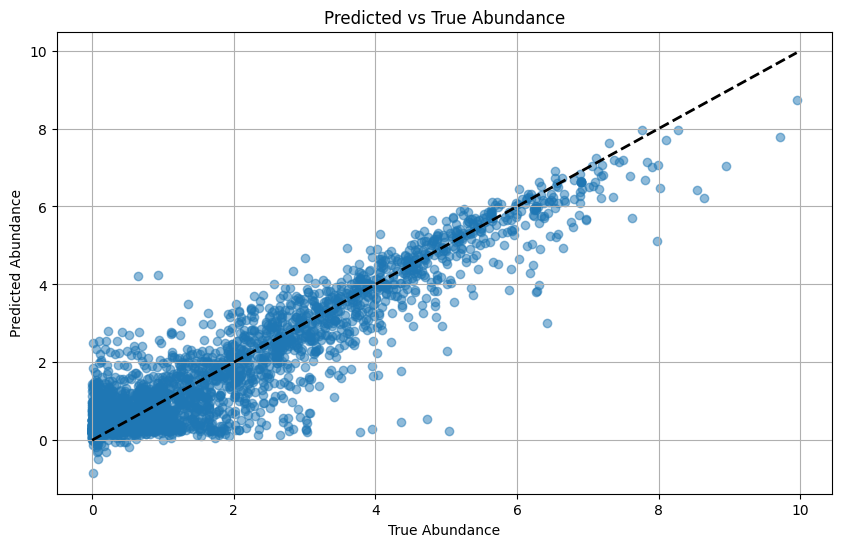

In [56]:
# plot y_pred vs y_test
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Abundance')
plt.ylabel('Predicted Abundance')
plt.title('Predicted vs True Abundance')
plt.grid()
plt.show()